# A. Supervised Learning

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score

In [41]:
data = pd.read_csv("bmw.csv")

In [45]:
# variabel (x) dan target (y)
X_classification = data[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y_classification = data['model']

In [46]:
# variabel (x) dan target (y) 2
X_regression = data[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y_regression = data['price']

In [49]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

## A1 Metode SVM

In [82]:
## instalasi model svc
svc_model = SVC()
svc_model.fit(X_train_class, y_train_class)
y_pred_class = svc_model.predict(X_test_class)

In [53]:
#prediksi bmw
regression_model = LinearRegression()
regression_model.fit(X_train_reg, y_train_reg)
y_pred_reg = regression_model.predict(X_test_reg)

## A2 Evaluasi Metode Klasifikasi

In [58]:
# confusion amtrix
confusion = confusion_matrix(y_test_class, y_pred_class)
classification_rep = classification_report(y_test_class, y_pred_class)
print("Confusion Matrix (Classification):\n", confusion)
print("Classification Report:\n", classification_rep)

Confusion Matrix (Classification):
 [[  0   0 374   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 232   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 485   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 207   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 211   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0  19   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0  26   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   5   0   0   0   0   0   0   0   0   0   0  

c:\Users\TUF-DASH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\TUF-DASH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\TUF-DASH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [62]:
# clasification matrix
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)
print("Mean Absolute Error (Regression):", mae)
print("Mean Squared Error (Regression):", mse)
print("Root Mean Squared Error (Regression):", rmse)
print("R-squared Score (Regression):", r2)


Mean Absolute Error (Regression): 4630.708192784082
Mean Squared Error (Regression): 46264837.98100217
Root Mean Squared Error (Regression): 6801.826076944497
R-squared Score (Regression): 0.6422314780671716


## A3 Plot SVM

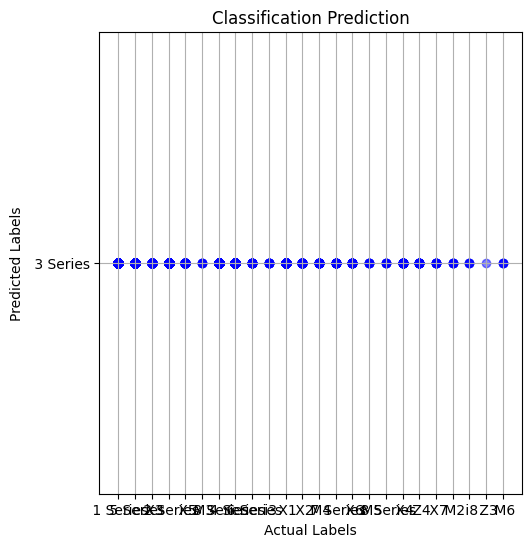

In [65]:
# A3.1 hasil prediksi
plt.figure(figsize=(12, 6))

# Classification plot
plt.subplot(1, 2, 1)
plt.scatter(y_test_class, y_pred_class, color='blue', alpha=0.5)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Classification Prediction")
plt.grid(True)

## A1 Metode Linear Regression

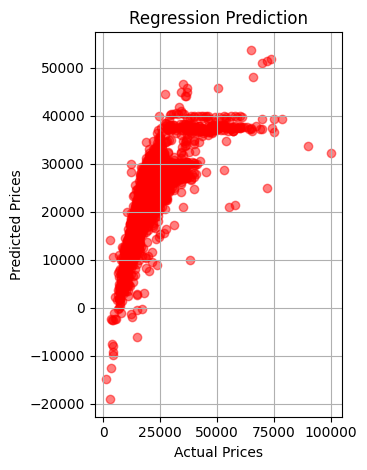

In [67]:
# A1.2: Linear Regression (Regresi)
# Pilih hanya 2 fitur untuk Linear Regression

plt.subplot(1, 2, 2)
plt.scatter(y_test_reg, y_pred_reg, color='red', alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Regression Prediction")
plt.grid(True)

plt.tight_layout()
plt.show()

# B. Unsupervised Learning

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, completeness_score, homogeneity_score


In [73]:
# Load dataset
data = pd.read_csv('bmw.csv')

In [75]:
# Define features (X) for clustering
X = data[['year', 'mileage', 'tax', 'mpg', 'engineSize']]

In [77]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

K = 5  
kmeans = KMeans(n_clusters=K, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

c:\Users\TUF-DASH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## A2 Evaluasi Metode Regresi

In [79]:
# Evaluation without true labels
silhouette = silhouette_score(X_scaled, data['cluster'])
calinski_harabasz = calinski_harabasz_score(X_scaled, data['cluster'])
davies_bouldin = davies_bouldin_score(X_scaled, data['cluster'])
print("Silhouette Score (Unlabeled Dataset):", silhouette)
print("Calinski-Harabasz Index (Unlabeled Dataset):", calinski_harabasz)
print("Davies-Bouldin Index (Unlabeled Dataset):", davies_bouldin)

Silhouette Score (Unlabeled Dataset): 0.44726491464384016
Calinski-Harabasz Index (Unlabeled Dataset): 5231.435113000237
Davies-Bouldin Index (Unlabeled Dataset): 0.8313328331998511


## A3 Plot Linear Regression

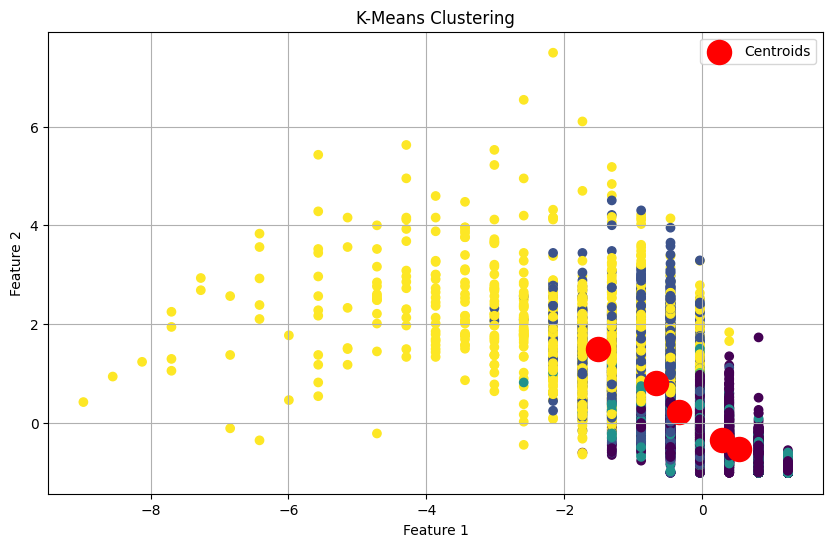

In [80]:
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering")
plt.legend()
plt.grid(True)

plt.show()